In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('bank-additional-full.csv',delimiter=';')
#print(df.head())

data = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']].reset_index()
print(data.head())
#print(data['emp.var.rate'].isnull().values.any())
#print(data['cons.price.idx'].isnull().values.any())
#print(data['cons.conf.idx'].isnull().values.any())
#print(data['euribor3m'].isnull().values.any())
#print(data['nr.employed'].isnull().values.any())

df['y_dummied'] = df.y.replace({'yes':1,'no':0})


labels = df.y_dummied
print(labels.head())
#print(labels['y'].isnull().values.any())

   index  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m
0      0           1.1          93.994          -36.4      4.857
1      1           1.1          93.994          -36.4      4.857
2      2           1.1          93.994          -36.4      4.857
3      3           1.1          93.994          -36.4      4.857
4      4           1.1          93.994          -36.4      4.857
0    0
1    0
2    0
3    0
4    0
Name: y_dummied, dtype: int64


In [2]:
print(data['emp.var.rate'].unique())
print(data['cons.price.idx'].unique())
print(data['cons.conf.idx'].unique())
print(data['euribor3m'].unique())

[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.423 1.415 1.41  1.405 1.406 1.4
 1.392 1.384 1.372 1.3

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler = MinMaxScaler()
scaler.fit(data)
X = scaler.transform(data)

In [5]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [6]:
#train_data, test_data, train_labels, test_labels = train_test_split(X, labels, test_size=0.2)
#classifier = KNeighborsClassifier(n_neighbors = 3)
#classifier.fit(train_data, train_labels)
#print(classifier.score(test_data, test_labels))

1
5
9
13
17


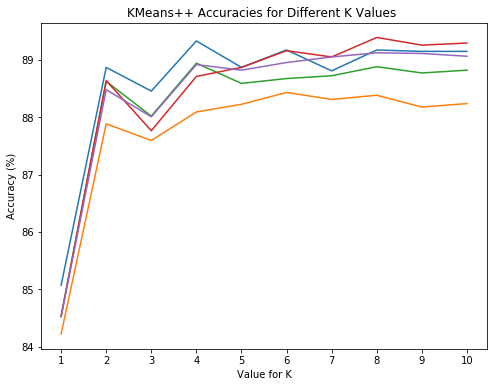

In [7]:
fig=plt.figure(figsize=[8,6])
ax=plt.subplot()
ax.set_xticks(range(1,11))
ax.set_xticklabels(range(1,11))
for state in range (1,21,4):
    train_data, test_data, train_labels, test_labels = train_test_split(X, labels, test_size=0.2, random_state=state)
    k_list = range(1,11)
    accuracies = []
    print(state)
    for k in range(1,11):
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(train_data, train_labels)
        accuracies.append((classifier.score(test_data, test_labels))*100)
    plt.plot(k_list, accuracies)
plt.title('KMeans++ Accuracies for Different K Values ')
plt.xlabel('Value for K')
plt.ylabel('Accuracy (%)')
plt.savefig('KMeans Accuracies')
plt.show()

In [8]:
classifier_final = KNeighborsClassifier(n_neighbors = 8)
classifier_final.fit(train_data, train_labels)
print(classifier_final.score(test_data, test_labels))

0.8912357368293276


In [9]:
for i in range(4):
    feature_data = data.iloc[:, i]
    feature_data = feature_data.values.reshape(-1,1)
    #scaler = MinMaxScaler()
    #scaler.fit(feature_data)
    #X2 = scaler.transform(data)
    train_data, test_data, train_labels, test_labels = train_test_split(feature_data, labels, test_size=0.2, random_state=4)
    i_list = range(4)
    accuracies = []
    classifier = KNeighborsClassifier(n_neighbors=8)
    classifier.fit(train_data, train_labels)
    accuracies.append((classifier.score(test_data, test_labels))*100)
    print(i, accuracies)

0 [89.29351784413693]
1 [88.34668608885652]
2 [88.14032532168002]
3 [88.68657441126487]


4640
4640
9280
1
5
9
13
17


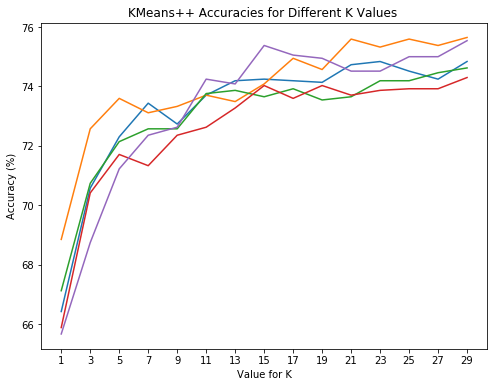

In [10]:
#accuracy is similar for all of them.
#Seems to be predicting 'no' for everything, which statistically means it would be 89% correct, corresponding to the number of failures

#Possible solution:
#1 Take all the 'yes' clients and the same number (4640) of 'no' clients randomly from the dataframe
#2 Join them together
#3 Select appropriate columns + assign dummy values to output variable
#4 Scale feature data
#5 Train data on this dataset and see if the percentage success rate is any higher than 50%

#1

yes_df = df[df.y == 'yes']
print(len(yes_df))
no_df_long = df[df.y == 'no']
#print(len(no_df_long))
import random
#Generate 5 random numbers between 10 and 30
randomlist = random.sample(range(0, 36548), 4640)
#print(randomlist[:5])
no_df = no_df_long.iloc[randomlist,:]
print(len(no_df))

#2

even_data = pd.concat([yes_df, no_df])
print(len(even_data))

#3

data_2 = even_data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']].reset_index()
even_data['y_dummied'] = even_data.y.replace({'yes':1,'no':0})
labels_2 = even_data.y_dummied

#4

scaler2 = MinMaxScaler()
scaler2.fit(data_2)
X_2 = scaler2.transform(data_2)

#5

plt.close('all')
fig=plt.figure(figsize=[8,6])
ax=plt.subplot()
ax.set_xticks(range(1,31,2))
ax.set_xticklabels(range(1,31,2))
for state in range (1,21,4):
    train_data, test_data, train_labels, test_labels = train_test_split(X_2, labels_2, test_size=0.2, random_state=state)
    k_list = range(1,31,2)
    accuracies = []
    print(state)
    for k in range(1,31,2):
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(train_data, train_labels)
        accuracies.append((classifier.score(test_data, test_labels))*100)
    plt.plot(k_list, accuracies)
plt.title('KMeans++ Accuracies for Different K Values ')
plt.xlabel('Value for K')
plt.ylabel('Accuracy (%)')
plt.savefig('KMeans Accuracies for Even Dataset')
plt.show()

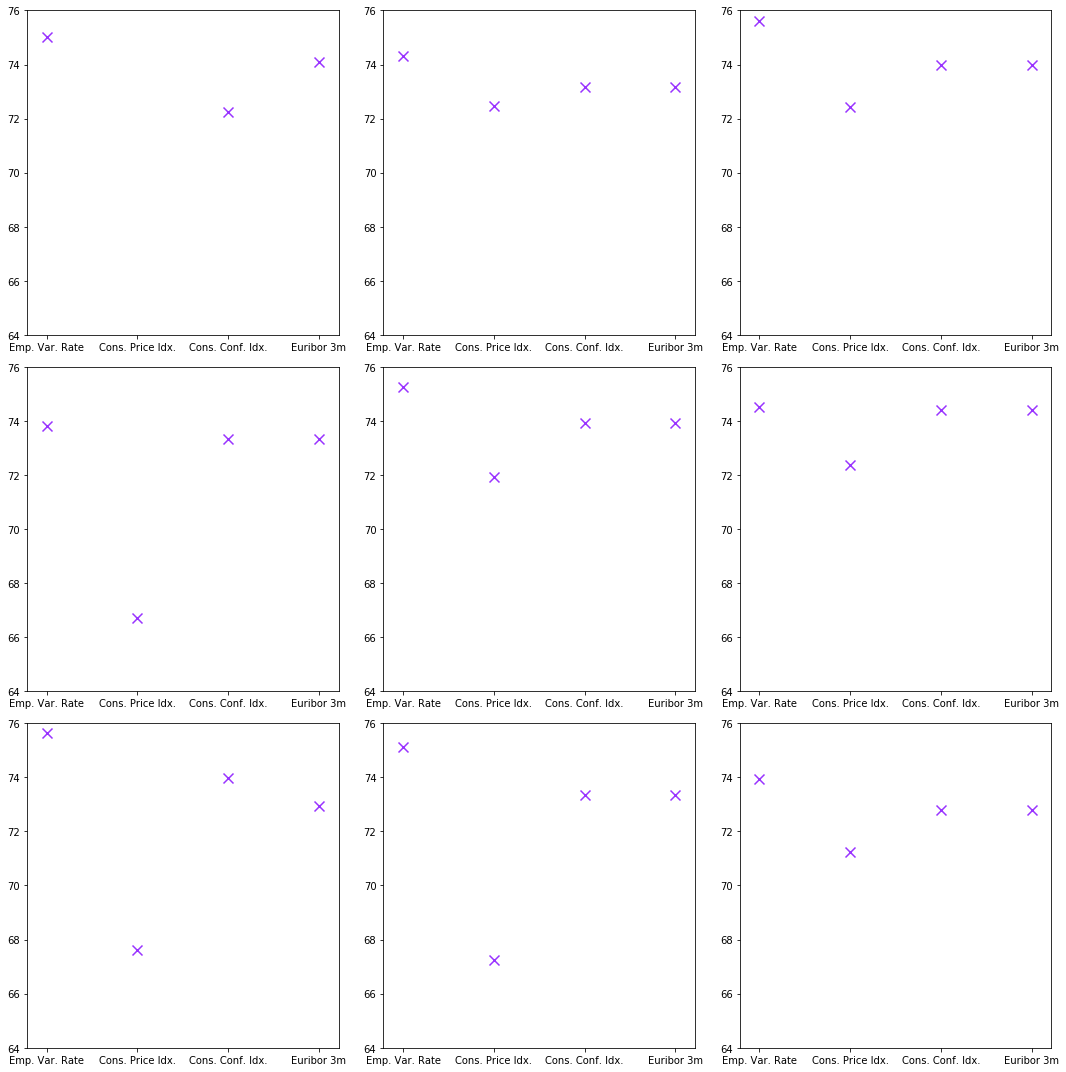

In [37]:
plt.close('all')
fig=plt.figure(figsize=[15,15])
for i in range(1,10):
    randomlist_2 = random.sample(range(0, 36548), 4640)
    no_df_2 = no_df_long.iloc[randomlist_2,:]
    even_data_2 = pd.concat([yes_df, no_df_2])
    data_3 = even_data_2[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']].reset_index()
    even_data_2['y_dummied'] = even_data_2.y.replace({'yes':1,'no':0})
    labels_3 = even_data_2.y_dummied
    ax = plt.subplot(3,3,i)
    ax.set_xticks(range(4))
    ax.set_xticklabels(['Emp. Var. Rate','Cons. Price Idx.','Cons. Conf. Idx.','Euribor 3m'])
    plt.ylim(64,76)
    #ax.set_yticks(range(5))
    #ax.set_yticklabels(range(55,80))
    i_list_2 = range(4)
    accuracies_2 = []
    for i in range(4):
        feature_data = data_3.iloc[:, i]
        feature_data = feature_data.values.reshape(-1,1)
        train_data, test_data, train_labels, test_labels = train_test_split(feature_data, labels_3, test_size=0.2, random_state=4)
        classifier = KNeighborsClassifier(n_neighbors=30)
        classifier.fit(train_data, train_labels)
        accuracies_2.append((classifier.score(test_data, test_labels))*100)   
    plt.scatter(list(i_list_2), accuracies_2,c='#9933ff', s=100, marker = 'x')
plt.tight_layout()
plt.savefig('Accuracies of 4 SE Features Varying with Random Data Selections')
plt.show()